In [1]:
import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import numpy as np
import pandas as pd
import ast
import math

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import sklearn.metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn import model_selection

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
#df, data_version_description, numeric_cols, cat_cols = vv.dataset_modelling_version(iteration_code="0011_20220703", row_limit=8000)
df, data_version_description, numeric_cols, cat_cols = vv.dataset_modelling_version(iteration_code="0011_20220703", row_limit=0)
print(data_version_description)
print(df.shape)
df.sample(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:496: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


small series of numeric keys
(24139, 10)


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age
ids,,,,,,,,,,
115439972,540000.0,51.53154,-0.020530,0.2,2.0,NaN,17,20211027,4.0,37.0
124267118,550000.0,51.340698,-0.048786,1.0,3.0,1.0,19,20220623,4.0,37.0
122931557,250000.0,51.576448,0.083240,0.3,1.0,1.0,11,20220429,4.0,37.0
110510009,315000.0,51.372105,-0.169401,0.3,3.0,1.0,12,20210716,4.0,37.0
121667510,300000.0,51.424489,-0.083391,0.0,1.0,1.0,5,20220329,4.0,37.0
122392421,288750.0,51.48369,-0.313830,0.3,1.0,NaN,17,20220414,4.0,6.0
119362646,550000.0,51.575702,0.203915,0.4,3.0,2.0,16,20220131,4.0,37.0
123942674,390000.0,51.39822,-0.255160,0.4,1.0,1.0,17,20220615,4.0,37.0
118461176,300000.0,51.355504,-0.182113,0.5,2.0,1.0,14,20220107,4.0,37.0


In [3]:
df = vv.tidy_dataset(df, coerce_to_float=['location.latitude'], na_infer_median=['bedrooms_model', 'bathrooms_model'], na_drop_column=[],
                     na_drop_rows=[])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24017 entries, 85780593 to 114438299
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price                         24017 non-null  float64
 1   location.latitude             24013 non-null  float64
 2   location.longitude            24017 non-null  float64
 3   distance_to_any_train         24017 non-null  float64
 4   bedrooms_model                24017 non-null  float64
 5   bathrooms_model               24017 non-null  float64
 6   analyticsProperty.imageCount  24017 non-null  int64  
 7   analyticsProperty.added       24017 non-null  int64  
 8   floorplan_count               24017 non-null  float64
 9   property_age                  16661 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 2.0+ MB


In [5]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age
ids,,,,,,,,,,
85780593,600000.0,51.565111,-0.398053,0.6,3.0,1.0,10,20220712,4.0,NaN
124954538,500000.0,51.503143,-0.475837,0.5,3.0,1.0,17,20220714,4.0,NaN
124868396,529950.0,51.539048,-0.480867,0.5,3.0,2.0,12,20220712,4.0,NaN
124933595,500000.0,51.526210,-0.447270,1.6,3.0,1.0,17,20220713,4.0,NaN
124993544,500000.0,51.545334,-0.444562,0.6,3.0,1.0,16,20220715,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
122919071,235000.0,51.457092,-0.118110,0.4,1.0,1.0,6,20220429,4.0,NaN
124314554,237500.0,51.439783,-0.126487,0.1,2.0,1.0,11,20220624,4.0,NaN
119491136,237500.0,51.457383,-0.112867,0.4,2.0,1.0,14,20220203,4.0,NaN


In [6]:
df.dropna(inplace=True)

In [7]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=101)
X_train.shape, X_test.shape

((15827, 9), (833, 9))

In [8]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])  # define the transformer for categorical columns

numeric_no_scale_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])  # define the transformer for categorical columns

categorical_transformer1 = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

categorical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])
features_preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer,
         ['location.latitude', 'location.longitude', 'distance_to_any_train', 'bedrooms_model', 'bathrooms_model', 'analyticsProperty.imageCount', 'analyticsProperty.added',
          'floorplan_count', 'property_age']),
        ('categorical1', categorical_transformer1, []),  #
        ('categorical2', categorical_transformer2, [])
    ])
features_noscale_preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_no_scale_transformer,
         ['location.latitude', 'location.longitude', 'distance_to_any_train', 'bedrooms_model', 'bathrooms_model', 'analyticsProperty.imageCount', 'analyticsProperty.added',
          'floorplan_count']),
        ('categorical1', categorical_transformer1, []),
        ('categorical2', categorical_transformer2, [])
    ])

features_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['location.latitude', 'location.longitude',
                                  'distance_to_any_train', 'bedrooms_model',
                                  'bathrooms_model',
                                  'analyticsProperty.imageCount',
                                  'analyticsProperty.added', 'floorplan_count',
                                  'property_age']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 []),
                                ('categorical2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

In [9]:
features_noscale_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['location.latitude', 'location.longitude',
                                  'distance_to_any_train', 'bedrooms_model',
                                  'bathrooms_model',
                                  'analyticsProperty.imageCount',
                                  'analyticsProperty.added',
                                  'floorplan_count']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 []),
                                ('categorical2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

In [10]:
class EstimatorPipeSelectionHelper:

    def __init__(self, models_and_params):
        # if not set(models.keys()).issubset(set(params.keys())):
        #     missing_params = list(set(models.keys()) - set(params.keys()))
        #     raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        # self.models = models
        # self.params = params
        # self.keys = models.keys()
        self.keys = models_and_params.keys()
        self.models_and_params = models_and_params
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            model = self.models_and_params[key]["model"]
            params = self.models_and_params[key]["params"]

            if 'noscale' in key:
                pipe = Pipeline(steps=[
                    ('preprocessor', features_noscale_preprocessor),  # preprocess features
                    ('estimator', model),
                ])  # start the training
            else:
                pipe = Pipeline(steps=[
                    ('preprocessor', features_preprocessor),  # preprocess features
                    ('estimator', model),
                ])  # start the training

            if self.models_and_params[key]["cv_type"] == 'grid':
                print("Running GridSearchCV for %s." % key)
                gs = GridSearchCV(pipe, params, cv=cv, n_jobs=n_jobs,
                                  verbose=verbose, scoring=scoring, refit=refit,
                                  return_train_score=True)
                gs.fit(X, y)
                self.grid_searches[key] = gs
            elif self.models_and_params[key]["cv_type"] == 'random':
                print("Running RandomizedSearchCV for %s." % key)
                gs = RandomizedSearchCV(pipe, params, cv=cv, n_jobs=n_jobs,
                                  verbose=verbose, scoring=scoring, refit=refit,
                                  return_train_score=True)
                gs.fit(X, y)
                self.grid_searches[key] = gs
            else:
                raise ValueError()

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            #return pd.Series({**params, **d})
            return pd.Series({**params, **d, **{'params_full': str(params)}})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [12]:
models_and_params = {
    'KNN best': {
        'model': KNeighborsRegressor(),
        'params': {'estimator__n_neighbors': [10]},
        'cv_type': 'grid'
    },
    'RF best unscaled': {
        'model': RandomForestRegressor(),
        'params': {'estimator__n_estimators': [100],
                   'estimator__max_depth': [10]},
        'cv_type': 'grid'
    },
}

helper = EstimatorPipeSelectionHelper(models_and_params)
helper.fit(X_train, y_train, scoring='neg_mean_squared_error', n_jobs=2)

score_summary = helper.score_summary(sort_by='max_score')
score_summary

Running GridSearchCV for KNN best.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Running GridSearchCV for RF best unscaled.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
KNN best
RF best unscaled


,estimator,min_score,mean_score,max_score,std_score,estimator__n_neighbors,params_full,estimator__max_depth,estimator__n_estimators
1,RF best unscaled,-5975594752.1195,-5792081848.70642,-5524230607.323617,193678624.255838,NaN,"{'estimator__max_depth': 10, 'estimator__n_est...",10,100
0,KNN best,-7491927840.392087,-7388645567.668176,-7275347780.128749,88701610.390051,10,{'estimator__n_neighbors': 10},NaN,NaN


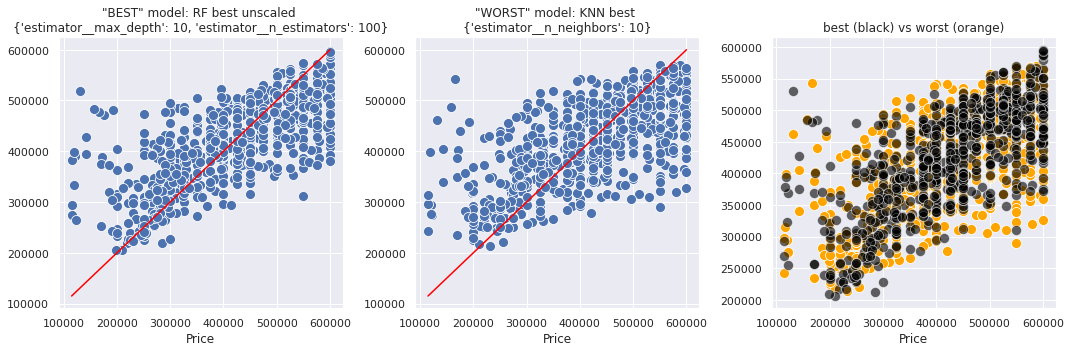

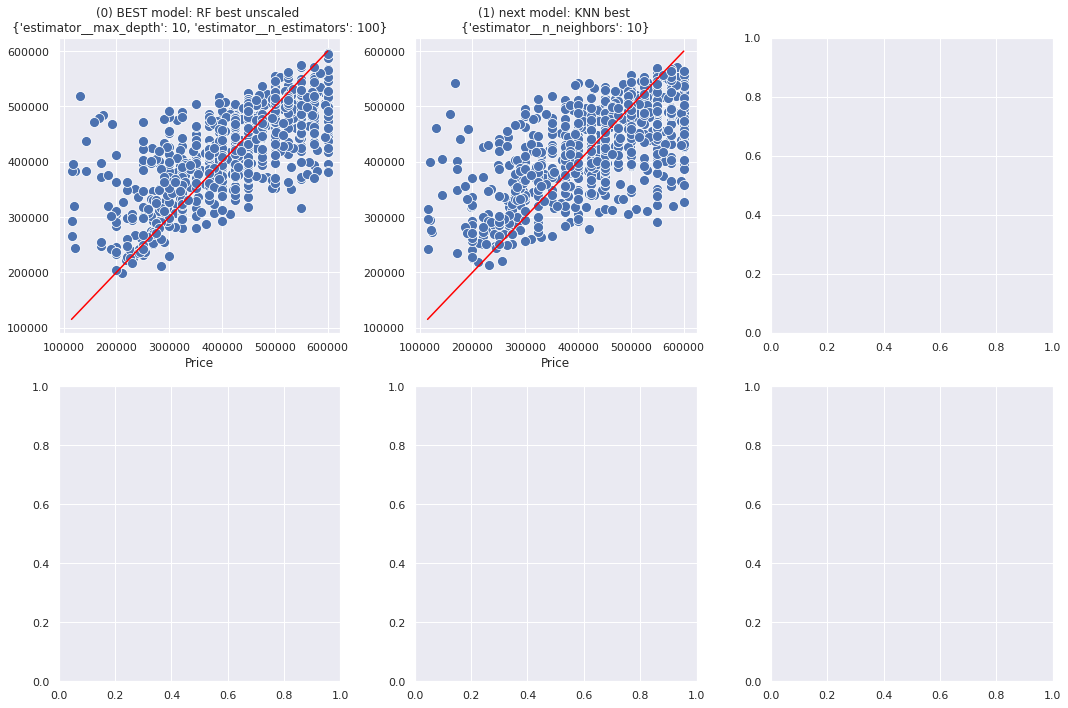

In [13]:
if False:
    if False:
        sns.plotting_context()
        # https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme

    best_estimator = score_summary.iloc[0]
    worst_estimator = score_summary.iloc[-1]
    best_estimator, worst_estimator

    name_best = best_estimator["estimator"]
    params_str = best_estimator["params_full"]

    params_best = ast.literal_eval(params_str)
    print("best", params_best)
    KNeighborsRegressor().set_params()

    if 'noscale' in name_best:
        pipe = Pipeline(steps=[
            ('preprocessor', features_noscale_preprocessor),  # preprocess features
            ('estimator', models1[name_best]),
        ])  # start the training
    else:
        pipe = Pipeline(steps=[
            ('preprocessor', features_preprocessor),
            ('estimator', models1[name_best]),  # preprocess features
        ])  # start the training

    fig, ax = plt.subplots()
    ax.scatter(y_test, pipe.set_params(**params_best).fit(X_train, y_train).predict(X_test), edgecolors=(0, 0, 1))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
    ax.set_ylabel('Predicted')
    ax.set_xlabel('Actual')
    ax.title.set_text(f'best model: {name_best} {params_best}')

    name_worst = worst_estimator["estimator"]
    params_str = worst_estimator["params_full"]

    params_worst = ast.literal_eval(params_str)
    print("worst", params_worst)

    if 'noscale' in name_worst:
        pipe = Pipeline(steps=[
            ('preprocessor', features_noscale_preprocessor),  # preprocess features
            ('estimator', models1[name_worst]),
        ])  # start the training
    else:
        pipe = Pipeline(steps=[
            ('preprocessor', features_preprocessor),
            ('estimator', models1[name_worst]),  # preprocess features
        ])  # start the training

    fig, ax = plt.subplots()
    ax.scatter(y_test, pipe.set_params(**params_worst).fit(X_train, y_train).predict(X_test), edgecolors=(0, 0, 1))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
    ax.set_ylabel('Predicted')
    ax.set_xlabel('Actual')
    ax.title.set_text(f'worst model: {name_worst} {params_worst}')


def make_pipe(name):
    if 'noscale' in name:
        pipe = Pipeline(steps=[
            ('preprocessor', features_noscale_preprocessor),  # preprocess features
            ('estimator', models_and_params[name]["model"]),
        ])  # start the training
    else:
        pipe = Pipeline(steps=[
            ('preprocessor', features_preprocessor),
            ('estimator', models_and_params[name]["model"]),  # preprocess features
        ])  # start the training

    return pipe


if True:
    #sns.set(rc={"figure.figsize": (10, 10)})
    sns.set_theme(font_scale=2, rc=None)
    sns.set_theme(font_scale=1, rc=None)

    #total_graphs = len(score_summary)
    # max_horizontal = 4
    # index2 = 0
    # resultant_rows = math.ceil(total_graphs / max_horizontal)
    # #subplots_adjust()
    #
    # #fig, axes = plt.subplots(nrows=resultant_rows, ncols=max_horizontal)
    fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

    plt.subplots_adjust(hspace=0.2)
    plt.subplots_adjust(wspace=0.2)

    best_estimator = score_summary.iloc[0]
    worst_estimator = score_summary.iloc[-1]

    name_best = best_estimator["estimator"]
    params_str = best_estimator["params_full"]
    params_best = ast.literal_eval(params_str)

    name_worst = worst_estimator["estimator"]
    params_str = worst_estimator["params_full"]
    params_worst = ast.literal_eval(params_str)

    KNeighborsRegressor().set_params()

    best_pipe = make_pipe(name_best)
    worst_pipe = make_pipe(name_worst)

    coordinates = axes[0]
    sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], ax=axes[0], color='red')
    sns.scatterplot(x=y_test, y=best_pipe.set_params(**params_best).fit(X_train, y_train).predict(X_test), ax=axes[0], s=100).set(
        title=f'"BEST" model: {name_best} \n{params_best}')

    sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], ax=axes[1], color='red')
    sns.scatterplot(x=y_test, y=worst_pipe.set_params(**params_worst).fit(X_train, y_train).predict(X_test), ax=axes[1], s=100).set(
        title=f'"WORST" model: {name_worst} \n{params_worst}')

    sns.scatterplot(x=y_test, y=worst_pipe.set_params(**params_worst).fit(X_train, y_train).predict(X_test), ax=axes[2], s=100, color='orange')
    sns.scatterplot(x=y_test, y=best_pipe.set_params(**params_best).fit(X_train, y_train).predict(X_test), ax=axes[2], s=100, alpha=0.6, color='black').set(
        title='best (black) vs worst (orange)')

    fig.tight_layout()
    plt.show()

if True:
    max_horizontal = 3

    #sns.set()
    #sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
    sns.set(rc={"figure.figsize": (20, 20)})
    sns.set_theme(font_scale=2, rc=None)
    sns.set_theme(font_scale=1, rc=None)

    total_graphs = len(score_summary)
    index2 = 0
    resultant_rows = math.ceil(total_graphs / max_horizontal)
    #subplots_adjust()

    #fig, axes = plt.subplots(nrows=resultant_rows, ncols=max_horizontal)
    fig, axes = plt.subplots(nrows=2, ncols=max_horizontal, figsize=(15, 10))

    plt.subplots_adjust(hspace=0.2)
    plt.subplots_adjust(wspace=0.2)

    for (key, next_estimator), index in zip(score_summary.iterrows(), range(total_graphs)):
        if index % (max_horizontal * 2) == 0 and index != 0:
            index2 = 0
            fig.tight_layout()
            plt.show()
            #fig, axes = plt.subplots(nrows=resultant_rows, ncols=max_horizontal)
            fig, axes = plt.subplots(nrows=2, ncols=max_horizontal, figsize=(15, 10))

        name_next = next_estimator["estimator"]
        params_str = next_estimator["params_full"]
        params_next = ast.literal_eval(params_str)
        #print("next", params_next)

        if 'noscale' in name_next:
            pipe = Pipeline(steps=[
                ('preprocessor', features_noscale_preprocessor),  # preprocess features
                ('estimator', models_and_params[name_next]["model"]),
            ])  # start the training
        else:
            pipe = Pipeline(steps=[
                ('preprocessor', features_preprocessor),
                ('estimator', models_and_params[name_next]["model"]),  # preprocess features
            ])  # start the training

        # 0 ==> 0,0
        # 1 ==> 0,1
        # 2 ==> 1,0
        x_coor = index2 // max_horizontal
        y_coor = index2 % max_horizontal

        coordinates = axes[x_coor][y_coor]
        #sns.lineplot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], hue='red', lw=3)
        sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], ax=coordinates, color='red')
        sns.scatterplot(x=y_test, y=pipe.set_params(**params_next).fit(X_train, y_train).predict(X_test), ax=coordinates, s=100).set(
            title=f'({index}) {"BEST" if index == 0 else "next"} model: {name_next} \n{params_next}')
        #if index == 11: break
        index2 += 1

    fig.tight_layout()
    plt.show()